## Penalized Cox Models for Breast Cancer  

### About the Data  

X : Independent vector of observations for containing the expression levels for 76 genes, patient age, estrogen receptor status (er), tumor size and grade  
y : Observations on the dependent variable, time to distant metastasis (Right Censored)  

### Objective  

Predict (y) the time to distant metastasis for a patient given with observations (X)  

In [5]:
# === Import Libraries and Data ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sksurv.datasets import load_breast_cancer
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder

from sklearn import set_config
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# === Config ===
set_config(display="text")  # displays text representation of estimators

In [6]:
# Load Breast Cancer Data
X, y = load_breast_cancer()

# Encode Categorical Variables
Xt = OneHotEncoder().fit_transform(X)

### Penalized Cox Model Overview

See below a description of the model for the RIDGE penalty  

![Screenshot 2023-07-11 at 10.55.09 am.png](<attachment:Screenshot 2023-07-11 at 10.55.09 am.png>)
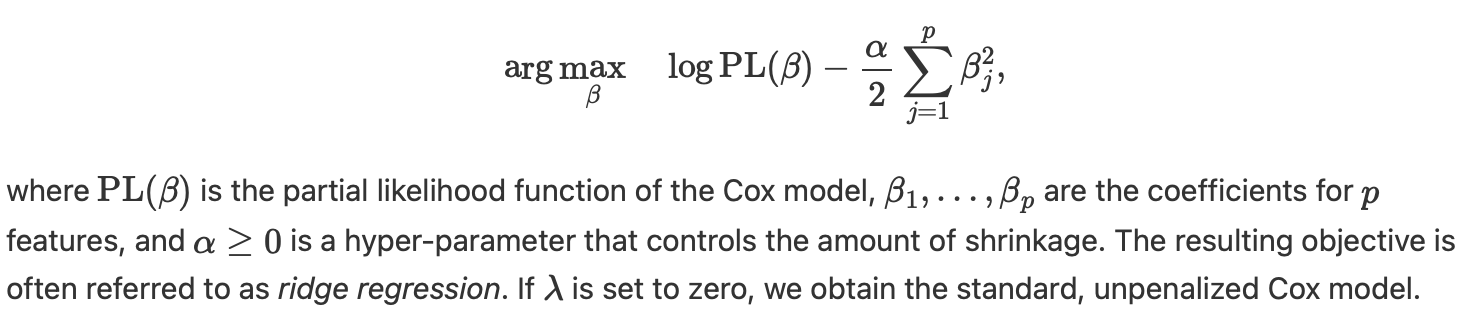

In [7]:
# Fit model coefficients using varying alphas 

alphas = 10.0 ** np.linspace(-4, 4, 50)
coefficients = {}

cph = CoxPHSurvivalAnalysis()

for alpha in alphas :

    cph.set_params(alpha=alpha)
    cph.fit(Xt, y)

    key = round(alpha, 5)
    coefficients[key] = cph.coef_

coefficients = pd.DataFrame.from_dict(coefficients).rename_axis(index="feature", columns="alpha").set_index(Xt.columns)

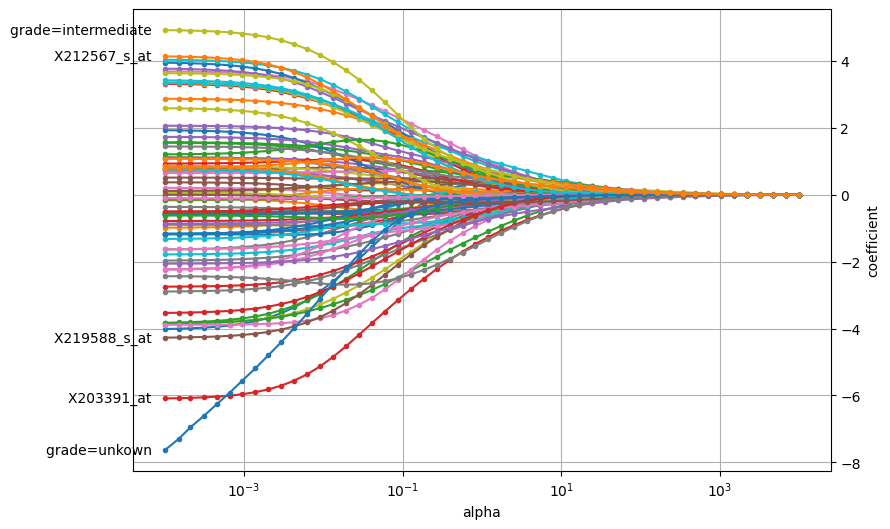

In [8]:
# Plot the coefficients 

def plot_coefficients(coefs, n_highlight) :
    
    _, ax = plt.subplots(figsize=(9, 6))
    n_features = coefs.shape[0]
    alphas = coefs.columns
    for row in coefs.itertuples():
        ax.semilogx(alphas, row[1:], ".-", label=row.Index)

    alpha_min = alphas.min()
    top_coefs = coefs.loc[:, alpha_min].map(abs).sort_values().tail(n_highlight)
    for name in top_coefs.index:
        coef = coefs.loc[name, alpha_min]
        plt.text(alpha_min, coef, name + "   ", horizontalalignment="right", verticalalignment="center")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.grid(True)
    ax.set_xlabel("alpha")
    ax.set_ylabel("coefficient")

# Run the plot

plot_coefficients(coefficients, n_highlight=5)